# **Assignment 1**
## Question 2
___


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(10)
plt.style.use('ggplot')

n=20

def loadData(n=n):
    Root = os.getcwd().replace("\\","/")
    dataSet = dict()
    for set in ["test", "train","valid" ]:
        data= np.genfromtxt(f"{Root}/Datasets/Dataset_1_{set:s}.csv", delimiter = ",", )
        N     = np.shape(data)[0]
        x1    = np.array([x[0] for x in data]).reshape((N,1))

        dataSet[set] = {
                "data": data,
                "N"     : N,
                "x1"    : x1,
                "X"     : np.array([x1**i for i in range( n+1 )]).T.reshape((N,n+1)),
                "Y"     : np.array([x[1] for x in data]).reshape((N,1))
                }

    return dataSet


def wCalculator(dataSet, lambd=0, n=n):
    X = dataSet["X"]
    Y = dataSet["Y"]
    MP = np.linalg.inv( np.matmul(X.T,X) + lambd * np.eye(n+1) )
    W    = np.matmul( np.matmul(MP,X.T) , Y )

    return W


def costFunction(dataSet, W, lambd=0):
    X = dataSet["X"]
    Y = dataSet["Y"]
    N = dataSet["N"]
    
    E = (np.sum((Y-np.matmul(X,W))**2) + lambd * np.sum(W**2))
    return np.sqrt(E/N)


dataSet = loadData()

In [2]:
print("a)\n")
dataSet = loadData()
W = wCalculator(dataSet["train"])
RMSE_train = costFunction(dataSet["train"], W)
RMSE_valid = costFunction(dataSet["valid"], W)

print(f"The RMSE of Train Dataset: {RMSE_train:.4f}")
print(f"The RMSE of Valid Dataset: {RMSE_valid:.4f}")

print("\n" + "\n".join([f"W{i:2} : {W[i][0]:+.3f}" for i in range(n+1)]))


a)

The RMSE of Train Dataset: 2.5446
The RMSE of Valid Dataset: 37.6148

W 0 : -3.894
W 1 : -15.398
W 2 : +155.201
W 3 : +1905.112
W 4 : -7715.792
W 5 : -35654.283
W 6 : +126734.750
W 7 : +289346.742
W 8 : -998454.849
W 9 : -1250854.288
W10 : +4374807.138
W11 : +3151169.151
W12 : -11423176.816
W13 : -4771051.624
W14 : +18188075.690
W15 : +4269125.229
W16 : -17313174.373
W17 : -2075167.226
W18 : +9051177.919
W19 : +421058.882
W20 : -1998594.781


b)


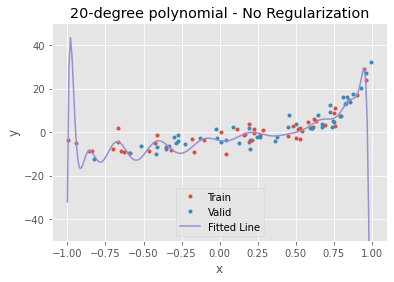

In [3]:
print("b)")
x_ = np.linspace(-1,1,201).reshape((201,1))
X_ = np.array([x_**i for i in range( n+1 )]).T.reshape((201,n+1))
y_ = np.matmul(X_,W)

plt.plot(dataSet["train"]["x1"],dataSet["train"]["Y"],".", label="Train")
plt.plot(dataSet["valid"]["x1"],dataSet["valid"]["Y"],".", label="Valid")
plt.plot(x_,y_,"-", label="Fitted Line")
plt.ylim(-50, 50)
plt.title(f"{n}-degree polynomial - No Regularization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

2-a
Minimum of RMSE for train dataset: 2.984 , Corresponds to λ = 0.01
Minimum of RMSE for valid dataset: 3.043 , Corresponds to λ = 0.01
Minimum of RMSE for test  dataset: 3.305 , Corresponds to λ = 0.01


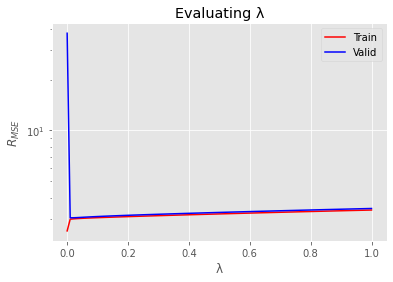

In [4]:
print("2-a")
Lambd= np.linspace(0,1,101)
RMSE_train = np.zeros((len(Lambd),1))
RMSE_valid = np.zeros((len(Lambd),1))

for idx, lambd in enumerate(Lambd):
    W = wCalculator(dataSet["train"], lambd)
    RMSE_train[idx] = costFunction(dataSet["train"], W, lambd)
    RMSE_valid[idx] = costFunction(dataSet["valid"], W, lambd)

arg = np.argmin(RMSE_valid)
L = Lambd[arg]
W = wCalculator(dataSet["train"], L)
RMSE_test = costFunction(dataSet["test"], W, L)

plt.plot(Lambd ,RMSE_train,"r", label="Train")
plt.plot(Lambd ,RMSE_valid,"b", label="Valid")
print(f"Minimum of RMSE for train dataset: {RMSE_train[arg][0]:.3f} , Corresponds to \u03BB = {L}")
print(f"Minimum of RMSE for valid dataset: {RMSE_valid[arg][0]:.3f} , Corresponds to \u03BB = {L}")
print(f"Minimum of RMSE for test  dataset: {RMSE_test:.3f} , Corresponds to \u03BB = {L}")

plt.title("Evaluating \u03BB")
plt.xlabel("\u03BB")
plt.ylabel("$R_{MSE}$")
plt.yscale("log")
plt.legend()


2-
Minimum of RMSE for train dataset: 2.988 , Corresponds to λ = 0.0126
Minimum of RMSE for valid dataset: 3.042 , Corresponds to λ = 0.0126
Minimum of RMSE for test  dataset: 3.302 , Corresponds to λ = 0.0126


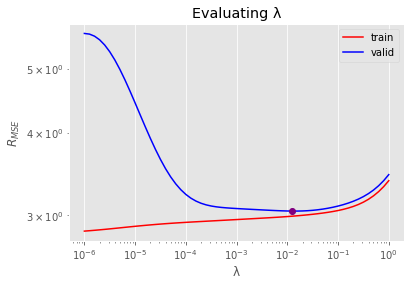

In [5]:
print("2-")
Lambd= 10**np.linspace(-6,0,61)
RMSE_train = np.zeros((len(Lambd),1))
RMSE_valid = np.zeros((len(Lambd),1))

for idx, lambd in enumerate(Lambd):
    W = wCalculator(dataSet["train"], lambd)
    RMSE_train[idx] = costFunction(dataSet["train"], W, lambd)
    RMSE_valid[idx] = costFunction(dataSet["valid"], W, lambd)

arg = np.argmin(RMSE_valid)
L = Lambd[arg]
W = wCalculator(dataSet["train"], L)
RMSE_test = costFunction(dataSet["test"], W, L)

plt.plot(Lambd ,RMSE_train,"r", label="train")
plt.plot(Lambd ,RMSE_valid,"b", label="valid")
print(f"Minimum of RMSE for train dataset: {RMSE_train[arg][0]:.3f} , Corresponds to \u03BB = {L:.4f}")
print(f"Minimum of RMSE for valid dataset: {RMSE_valid[arg][0]:.3f} , Corresponds to \u03BB = {L:.4f}")
print(f"Minimum of RMSE for test  dataset: {RMSE_test:.3f} , Corresponds to \u03BB = {L:.4f}")

plt.plot(L,RMSE_valid[arg][0],"o",color="purple")

plt.title("Evaluating \u03BB")
plt.xlabel("\u03BB")
plt.xscale("log")
plt.ylabel("$R_{MSE}$")
plt.yscale("log")
plt.legend()



W 0 : -3.197
W 1 : +8.652
W 2 : +0.393
W 3 : -7.819
W 4 : +6.566
W 5 : +8.914
W 6 : +3.056
W 7 : +8.838
W 8 : +1.277
W 9 : +5.283
W10 : +1.621
W11 : +1.912
W12 : +2.354
W13 : -0.530
W14 : +2.493
W15 : -1.995
W16 : +1.791
W17 : -2.624
W18 : +0.354
W19 : -2.603
W20 : -1.600



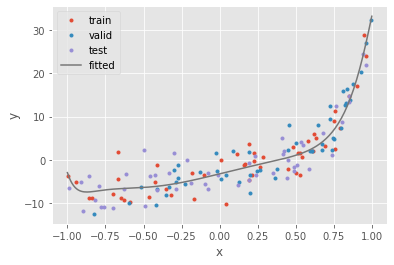

In [6]:
x_ = np.linspace(-1,1,201).reshape((201,1))
X_ = np.array([x_**i for i in range( n+1 )]).T.reshape((201,n+1))
y_ = np.matmul(X_,W)
plt.plot(dataSet["train"]["x1"], dataSet["train"]["Y"],".", label="train")
plt.plot(dataSet["valid"]["x1"], dataSet["valid"]["Y"],".", label="valid")
plt.plot(dataSet["test"]["x1"], dataSet["test"]["Y"],".", label="test")
plt.plot(x_,y_,"-", label="fitted")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
print("\n" + "\n".join([f"W{i:2} : {W[i][0]:+.3f}" for i in range(n+1)]) + "\n")